# Analiza stanovanj in prostorov za oddajo

Podatki, ki jih imamo o stanovanjih in prostorih so:
- Naslov
- Kraj
- Ime (oglasa)
- Vrsta
- Nadstropje
- Leto izgradnje
- Velikost v m2
- Cena
- Ponudnik oz. zasebna ponudba
- Izračunana je še cena na m2

In [1]:
import numpy as np
import pandas as pd
ponudbe = pd.read_csv('oglasi.csv', index_col='url')
ponudbe['cena_m2'] = ponudbe.cena / ponudbe.velikost
pd.options.display.max_rows = 15

## Pregled podaktov

In [2]:
ponudbe[:5]

,naslov,kraj,ime,vrsta,nadstropje,leto,velikost,cena,ponudnik,dan,mesec,cena_m2
url,,,,,,,,,,,,
/oglasi-oddaja/btc-poslovni-prostor_6174079/,BTC,BTC,BTC,Poslovni prostor,1,1990.0,340.00,3060.0,"Stoja trade, d.o.o., Ljubljana",1.0,1.0,9.000000
/oglasi-oddaja/fuzine-poslovni-prostor_6144580/,FUŽINE,FUŽINE,FUŽINE,Poslovni prostor,1,1995.0,82.89,550.0,"Stoja trade, d.o.o., Ljubljana",1.0,1.0,6.635300
/oglasi-oddaja/gozd-martuljek-zgornje-rute-hisa_6141653/,"GOZD MARTULJEK, ZGORNJE RUTE",GOZD MARTULJEK,"GOZD MARTULJEK, ZGORNJE RUTE",Hiša,NaN,1969.0,240.00,700.0,"INF - ING nepremičnine, storitve, d.o.o.",1.0,1.0,2.916667
/oglasi-oddaja/kolezija-zelena-pot-stanovanje_6188642/,"KOLEZIJA, ZELENA POT",KOLEZIJA,"KOLEZIJA, ZELENA POT",Stanovanje,2,1968.0,64.00,700.0,Zasebna ponudba,1.0,1.0,10.937500
/oglasi-oddaja/lj-bezigrad-dunajska-cesta-20-poslovni-prostor_6038044/,"LJ. BEŽIGRAD, DUNAJSKA CESTA 20",LJ. BEŽIGRAD,"LJ. BEŽIGRAD, DUNAJSKA CESTA 20",Poslovni prostor,P,1979.0,100.00,1800.0,"Zavarovalnica Triglav, d.d.",1.0,1.0,18.000000


## Število ponudb po krajih oz. predelih

In [3]:
print(ponudbe['kraj'].value_counts()[:15])
ponudbe['kraj'].value_counts()[:40].plot.bar(figsize=(15, 5))

LJ. CENTER      341
LJ. BEŽIGRAD    334
LJ. ŠIŠKA       190
KRANJ           182
LJ. VIČ         164
LJ. MOSTE       123
MB - CENTER     108
CELJE            84
BTC              80
KOPER            73
NOVO MESTO       66
ČRNUČE           56
MARIBOR          56
TRZIN            54
PTUJ             47
Name: kraj, dtype: int64


Vidimo, da se nahaja največ ponudb v Ljubljani, kar sem tudi pričakovala, ostala mesta, presenetil pa me je Trzin, saj je manjše mesto.

## Število nepremičnin po ponudnikih

Zasebna ponudba                                  912
Stoja trade, d.o.o., Ljubljana                   348
LJUBLJANA NEPREMIČNINE d.o.o.                    135
S-Invest d.o.o.                                  110
REGROUP d.o.o.                                    73
Nepremičninska družba d.o.o., PE RE/MAX Vogal     70
Aeon nepremičnine, d.o.o., Century 21 Emona       69
C-nep agencija, d.o.o.                            57
Fesst nepremičnine d.o.o.                         53
MESTO NEPREMIČNIN d.o.o.                          44
Name: ponudnik, dtype: int64


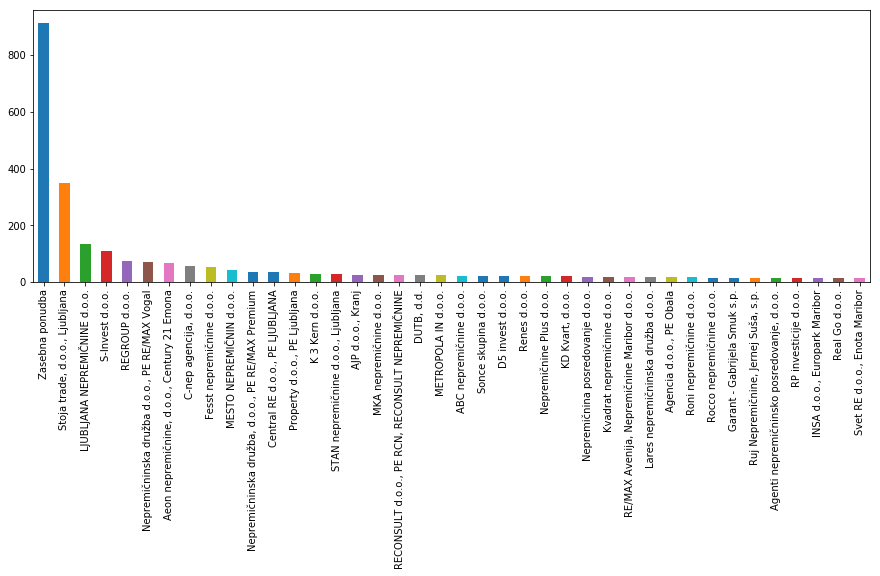

In [4]:
print(ponudbe['ponudnik'].value_counts()[:10])
ponudbe['ponudnik'].value_counts()[:40].plot.bar(figsize=(15, 5))

Skoraj polovica oglasov je v zasebni ponudbi, kar me je presenetilo, saj sem po svojih izkušnjah z nepremicnine.net pričakovala še več oglasov nepremičninskih agencij. Je pa zanimiv podatek, da je ima Stoja trade toliko več oglasov in delež na tržišču od ostalih.

# Nepremičnine po vrsti

Poslovni prostor     2387
Stanovanje            893
Hiša                  184
Garaža                127
Počitniški objekt      71
Posest                 48
Vikend                 12
Name: vrsta, dtype: int64


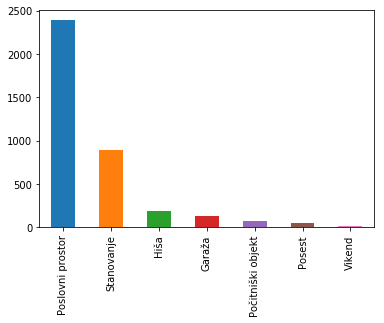

In [5]:
print(ponudbe['vrsta'].value_counts())
ponudbe['vrsta'].value_counts().plot.bar()

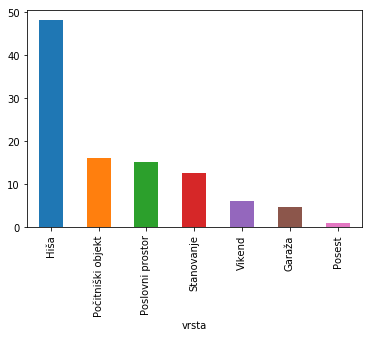

In [6]:
ponudbe.groupby('vrsta')['cena_m2'].mean().sort_values(ascending=False).plot.bar()

Ponudbe poslovnih prostorov prevladujejo nad ostalimi kategorijami. Najdražje pa so za najem po teh podatkih hiše, ker pa je cenovna razlika tolikšna, sem se odločila dodati še graf z cenami in velikostmi hiš, ki je pokazal, da je najbrž nekaj ponudb vnesenih narobe.

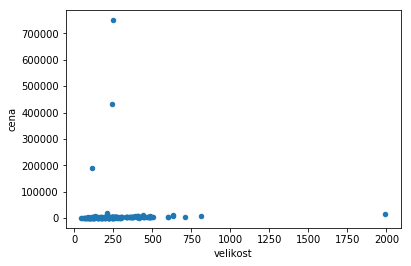

In [7]:
ponudbe[ponudbe.vrsta == 'Hiša'].plot.scatter(x='velikost', y='cena')

# Stanovanja

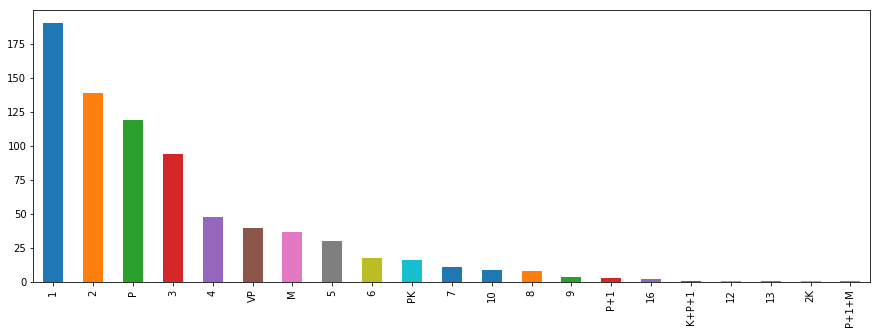

In [8]:
stanovanja = ponudbe[ponudbe.vrsta == 'Stanovanje']
stanovanja['nadstropje'].value_counts().plot.bar(figsize=(15, 5))

Večina stanovanj se oddaja v nižjih nadstropjih, k čemur pripomore tudi dejstvo da se veliko stanovanj nahaja v stanovanjkih hišah.

In [ ]:
stanovanja['ponudnik'].value_counts()[:40].plot.bar(logy=True, figsize=(15, 5))

Pri oddaji stanovanj se razmerje med zasebno oddajo in ponudbo agencij še dodatno poveča v primerjavi z vsemi nepremičninami.

In [ ]:
stanovanja.groupby('kraj')['cena_m2'].median().sort_values(ascending=False)[:40].plot.bar(logy=True, figsize=(15, 5))

Primerjava cene z lokacijo nam pokaže, da je pri nekaterih oglasih prišlo do pomote pri vnosu, hkrati pa pokaže, da se v Ljubljani cene močno spreminjajo glede na predel.

In [ ]:
stanovanja.groupby('ponudnik')['cena_m2'].median().sort_values(ascending=False)[:40].plot.bar(logy=True, figsize=(15, 5))

Tudi pri primerjavi cen med ponudniki stanovanj se opazi napačno vnešena stanovanja, hkrati pa lahko najdemo agencije, ki posredujejo najdražja stanovanja.

In [ ]:
# Ali velikost vpliva na ceno za m2
stanovanja.plot.scatter(x='velikost', y='cena_m2', logy=True, figsize=(15, 5))
# Ali velikost vpliva na koncno ceno
stanovanja.plot.scatter(x='velikost', y='cena', logy=True, figsize=(15, 5))
# Ali leto izgradnje vpliva na velikost
stanovanja.plot.scatter(x='leto', y='velikost', figsize=(15, 5))

Zgornji trije grafi pokažejo da:
- velikost stanovanja vpliva na ceno za m2 samo pri manjših stanovanjih
- se kot predvideno cena enakomerno viša z velikostjo stanovanja
- leto izgradnje ne vpliva preveč na velikost stanovanja

In [ ]:
stanovanja[stanovanja.leto > 1900]['leto'].plot.box()

Večina stanovanj, ki se oddajajo je bilo zgrajenih v zadnjih 40 letih.

In [ ]:
stanovanja[(stanovanja['cena_m2'] < 200) & (stanovanja.leto > 1850)].plot.scatter(x='leto', y='cena_m2', figsize=(15, 5))

Leto izgradnje večinoma nima vpliva na samo ceno najemnine.